In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
# from sklearn.datasets import load_boston

# Load dataset
data = pd.read_csv("ensemble_methods_data.csv")*1000

X = data.drop(columns="y")
y = data['y']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
score = root_mean_squared_error(y_test, y_pred)
print(f"RMSE score without scaling: {score:.3f}")
print(model.coef_)

RMSE score without scaling: 397.667
[ 8.00091511e+01  9.85926733e+01 -3.51361891e-03  1.19962914e-02
  3.78763273e-02 -1.15715170e-02  6.94045396e+01  1.42390617e-02
  1.29682994e-02  6.52844632e-03 -2.46286705e-02  2.02501278e-02
  1.95560289e-02 -2.10578981e-02 -2.10154619e-02  5.55684884e+00
  8.68725056e+01 -1.26084983e-03 -7.25931664e-03  4.05761718e-03]


In [83]:
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,895.355431,-804.315760,-241.497446,-491.153747,454.740912,-61.764200,253.165238,-256.179752,-746.578347,-205.859431,820.344013,-516.429644,-33.612565,479.441518,-196.466583,629.529584,-631.577729,-284.875493,-1548.618299,-176.774163
1,885.577082,238.498926,-1078.315067,917.768198,433.749686,358.917584,-1364.676326,-656.835469,-1116.450855,-440.902189,-52.473856,215.668771,-276.335295,-1039.793225,-352.546243,139.821359,1781.684786,-310.396136,459.204182,987.861582
2,1112.046842,-89.335865,268.166950,193.798714,629.558366,273.311250,-1506.922299,-215.567943,169.944711,-2021.002321,146.214796,-885.326432,-604.718867,-1204.329827,-772.636890,-1947.339873,-551.515730,1027.070301,-1188.384671,-160.904938
3,736.763345,223.994969,1030.438786,-334.603855,-1083.188447,1291.468889,-629.233763,272.517990,-265.828366,-836.194851,2914.109216,233.595081,-1277.084562,307.003060,2116.803055,-1419.384356,618.860330,565.632902,-17.862155,1077.293673
4,-37.886701,-2226.761525,-2.111680,1104.175157,604.024847,-748.071804,-35.757644,206.135380,-1335.016246,2435.985124,-284.139555,-1659.905563,527.568116,-74.252107,88.822962,-138.796401,820.967139,-513.396681,1941.746122,-85.418833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-200.216666,689.940277,173.067649,1512.067949,-832.863275,1284.080277,-2273.172203,-539.429794,-720.153977,1589.895595,103.829235,-836.338536,860.685421,-170.172531,-1866.448153,757.056002,683.414674,-153.897774,603.917041,241.043278
996,-364.952730,1072.507337,1607.345576,-167.121714,-1103.208366,490.974952,-1044.809194,-248.691126,815.737213,307.406698,-1966.356589,-221.253624,2056.207130,734.877786,-276.813300,538.296079,-839.209667,282.579950,-583.077439,860.473488
997,-721.569082,-479.964643,840.606713,863.923550,1911.606067,-825.291961,831.498867,-187.727024,2698.328836,-902.654360,798.091049,-641.164929,-1424.167600,-492.918275,-265.064997,1453.840237,138.856032,769.135779,-850.975081,242.070670
998,-543.910054,68.680710,403.940416,682.489209,-1636.301785,-141.241821,-1862.863586,2333.035562,907.979758,-588.340057,-534.772256,1494.731007,-484.955545,-856.501957,-1359.201269,157.098651,825.852670,289.784479,-1108.174696,646.045343


pd.DataFrame(X.columns, model.coef_)
# Plot the coefficients
plt.barh(X.columns, model.coef_, color='lightgreen')

plt.title('Feature Importance - Linear Regression (No Scaling)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid()
plt.gca().invert_yaxis()  # Invert y-axis to have the largest at the top
plt.tight_layout()
plt.show()

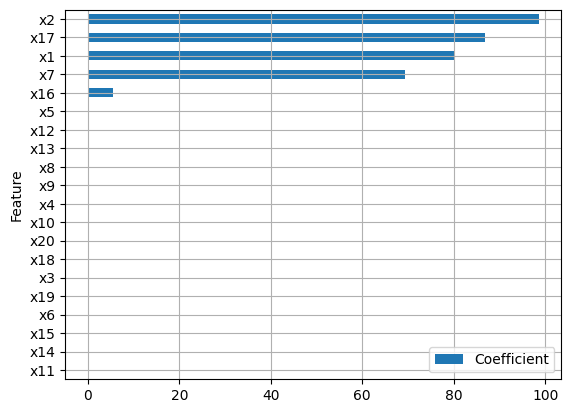

In [47]:
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=True)
coefficients_df.plot(kind='barh', x='Feature', y='Coefficient',legend=True)
plt.grid()

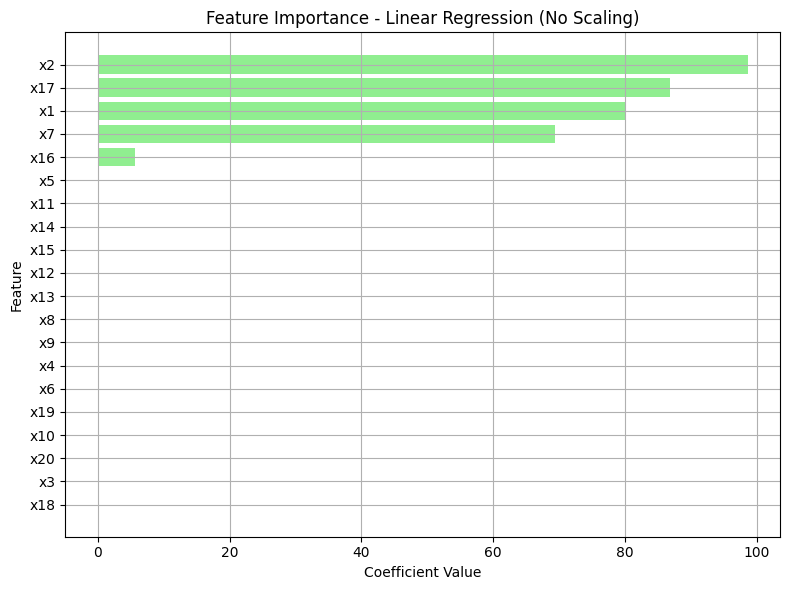

In [34]:
# Coefficients from the model
coefficients_no_scale = model.coef_

# Feature names
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients_no_scale
})

# Sort by the absolute value of coefficients
coefficients_df['Importance'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(8, 6))

# Plot the coefficients
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='lightgreen')

plt.title('Feature Importance - Linear Regression (No Scaling)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid()
plt.gca().invert_yaxis()  # Invert y-axis to have the largest at the top
plt.tight_layout()
plt.show()

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train linear regression
model = LinearRegression()
model_r = Ridge(alpha=100)
model.fit(X_train_scaled, y_train)
model_r.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_r = model_r.predict(X_test_scaled)

# Evaluate the model
score = root_mean_squared_error(y_test, y_pred)
score_r = root_mean_squared_error(y_test, y_pred_r)
print(f"RMSE score with scaling: {score:.3f},  {score_r:.3f}")
# print(model.coef_)
# print(model_r.coef_)


RMSE score with scaling: 0.398,  18.690


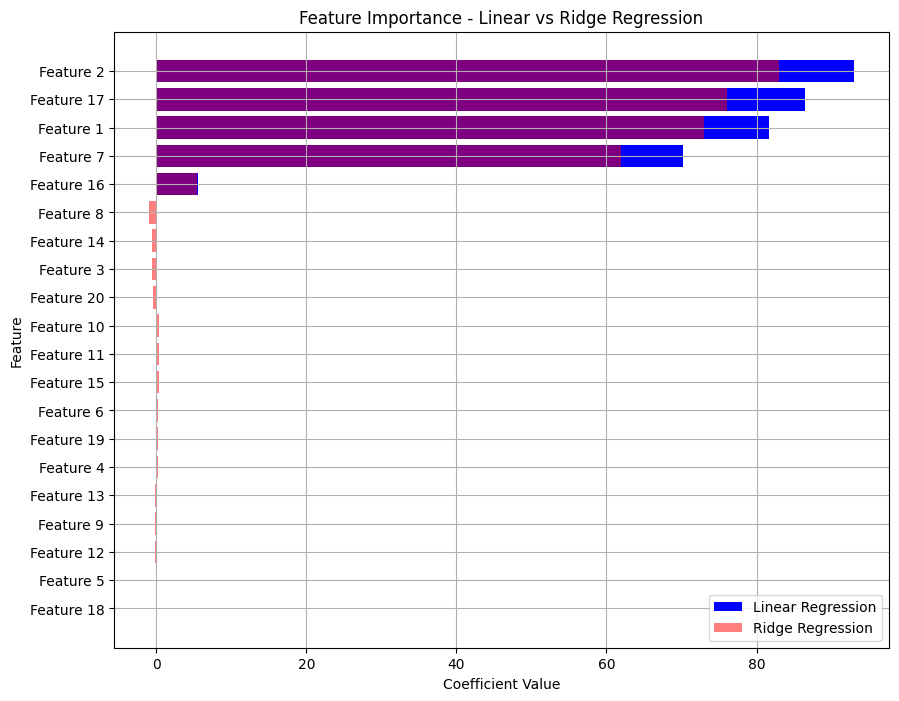

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Example feature names (replace these with your actual feature names)
feature_names = [f'Feature {i+1}' for i in range(X_train.shape[1])]

# Coefficients from the linear regression and Ridge regression models
coefficients_lr = model.coef_
coefficients_ridge = model_r.coef_

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear Regression': coefficients_lr,
    'Ridge Regression': coefficients_ridge
})

# Calculate the absolute values to sort by importance
coefficients_df['Importance'] = np.abs(coefficients_df[['Linear Regression', 'Ridge Regression']]).max(axis=1)

# Sort by the calculated importance
coefficients_df = coefficients_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))

# Plot the coefficients
plt.barh(coefficients_df['Feature'], coefficients_df['Linear Regression'], color='blue', label='Linear Regression')
plt.barh(coefficients_df['Feature'], coefficients_df['Ridge Regression'], color='red', alpha=0.5, label='Ridge Regression')

plt.title('Feature Importance - Linear vs Ridge Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.legend()
plt.grid()
plt.gca().invert_yaxis()  # Invert y-axis to have the largest at the top
plt.show()


In [55]:
from sklearn.pipeline import Pipeline

# Create a pipeline with scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [59]:

y_pred = pipeline.predict(X_test)

# Evaluate the model
score = root_mean_squared_error(y_test, y_pred)
print(f"RMSE score without scaling: {score:.3f}")
print(pipeline['regressor'].coef_)


RMSE score without scaling: 0.398
[ 8.17080629e+01  9.29651514e+01 -3.51598323e-03  1.17952327e-02
  3.75483272e-02 -1.18533761e-02  7.01843892e+01  1.48374030e-02
  1.33718003e-02  6.65357066e-03 -2.55652405e-02  2.05221792e-02
  1.91734223e-02 -1.99568737e-02 -2.00685570e-02  5.61817009e+00
  8.65110541e+01 -1.25767395e-03 -7.24194380e-03  3.90604456e-03]


In [72]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder

# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)
X, y = housing.data, housing.target

# Artificially create a categorical feature by binning 'HouseAge'
X['HouseAgeCategory'] = pd.cut(X['HouseAge'], bins=[0, 20, 40, 60], labels=['Young', 'Middle-aged', 'Old'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
categorical_features = ['HouseAgeCategory']

# Define preprocessing for numeric features using RobustScaler
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())  # You can switch to StandardScaler, MinMaxScaler, etc.
])

# Define preprocessing for numeric features using RobustScaler
numeric_transformer_sc = Pipeline(steps=[
    ('scaler_sc', StandardScaler())  # You can switch to StandardScaler, MinMaxScaler, etc.
])

# Define preprocessing for categorical features using OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']),
        ('cat', categorical_transformer, categorical_features),
        ('num_sc', numeric_transformer_sc, ['Latitude', 'Longitude'])
    ])

# Create a pipeline with preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['MedInc', 'AveRooms',
                                                   'AveBedrms', 'Population',
                                                   'AveOccup']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HouseAgeCategory']),
                                                 ('num_sc',
                                                  Pipeline(steps=[('scaler_sc',
                                                                   StandardScaler())]),
                                                  ['Latitude', 'Longitude'])])),
                ('regressor', LinearRegression())])

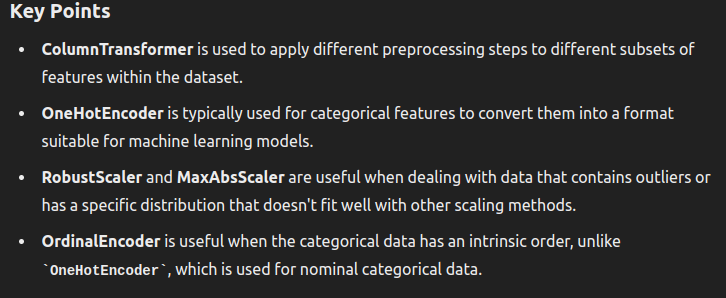

In [74]:
y_pred = pipeline.predict(X_test)

# Evaluate the model
score = root_mean_squared_error(y_test, y_pred)
print(f"RMSE score with pipeline: {score:.4f}")


RMSE score with pipeline: 0.7461


In [ ]:
MS